In [86]:
#import the packages
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [5]:
#import the datasets
cust=pd.read_excel('Credit Card Data.xlsx',sheet_name='Customer Acqusition')
spend=pd.read_excel('Credit Card Data.xlsx',sheet_name='Spend')
repay=pd.read_excel('Credit Card Data.xlsx',sheet_name='Repayment')

In [6]:
cust.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,50.497350,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,35.855817,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,27.356821,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,22.021249,BANGALORE,Platimum,10002,C5,Normal Salary


In [7]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,344054.980813
1,2,A1,2004-01-03,PETRO,467747.601626
2,3,A1,2004-01-15,CLOTHES,86878.954735
3,4,A1,2004-01-25,FOOD,269175.011875
4,5,A1,2005-01-17,CAMERA,3406.639477


In [8]:
repay.head()

,SL No:,Customer,Month,Amount
0,1,A1,2004-01-12,338932.141919
1,2,A1,2004-01-03,131778.688758
2,3,A1,2004-01-15,485981.516736
3,4,A1,2004-01-25,452865.826385
4,5,A1,2005-01-17,154684.838196


In [11]:
cust.dtypes

No            int64
Customer     object
Age         float64
City         object
Product      object
Limit         int64
Company      object
Segment      object
dtype: object

In [9]:
cust.isna().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

### 1. In the above dataset,
 a. In case age is less than 18, replace it with mean of age values.


In [15]:
cust['Age']=np.where(cust['Age'] < 18,cust['Age'].mean(),cust['Age'])

### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [20]:
#merging cust data and spend data
data1=pd.merge(cust,spend,on='Customer',how='inner')
#merging data1 and repay data
data=pd.merge(data1,repay,on='Customer',how='inner')

In [106]:
data.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,DOB,Sl No:,...,Type,Amount_x,SL No:,Month_y,Amount_y,month_name_x,month_name_y,monthly_profit,interest,year_x
0,1,A1,344054.980813,BANGALORE,Gold,500000,C1,Self Employed,1989.987651,1,...,JEWELLERY,344054.980813,1,2004-01-12,338932.141919,1,1,-5122.838893,-5122.838893,2004
1,1,A1,344054.980813,BANGALORE,Gold,500000,C1,Self Employed,1989.987651,1,...,JEWELLERY,344054.980813,2,2004-01-03,131778.688758,1,1,-212276.292055,-212276.292055,2004
2,1,A1,344054.980813,BANGALORE,Gold,500000,C1,Self Employed,1989.987651,1,...,JEWELLERY,344054.980813,3,2004-01-15,485981.516736,1,1,141926.535923,4115.869542,2004
3,1,A1,344054.980813,BANGALORE,Gold,500000,C1,Self Employed,1989.987651,1,...,JEWELLERY,344054.980813,4,2004-01-25,452865.826385,1,1,108810.845572,3155.514522,2004
4,1,A1,344054.980813,BANGALORE,Gold,500000,C1,Self Employed,1989.987651,1,...,JEWELLERY,344054.980813,5,2005-01-17,154684.838196,1,1,-189370.142617,-189370.142617,2004


In [25]:
data['Amount_x']=np.where(data['Amount_x'] > data['Limit'],0.5 * data['Limit'],data['Amount_x'])

###  c. Incase the repayment amount is more than the limit, replace the repayment with the limit.


In [26]:
data['Amount_y']=np.where(data['Amount_y'] > data['Limit'], data['Limit'],data['Amount_y'])

### 2. From the above dataset create the following summaries:
 a. How many distinct customers exist?


In [28]:
data.Customer.nunique()

100

###  b. How many distinct categories exist?

In [29]:
data.Product.nunique()

3

###  c. What is the average monthly spend by customers?

In [36]:
data['month_name_x']=data['Month_x'].dt.month

In [39]:
monthly_spend=data.groupby(['Customer','month_name_x'])['Amount_x'].sum().reset_index()
avg_monthly_spend=monthly_spend.groupby('Customer')['Amount_x'].mean()

In [40]:
avg_monthly_spend

Customer
A1      1.396354e+07
A10     7.976486e+06
A100    4.625130e+04
A11     1.174216e+07
A12     1.911220e+07
            ...     
A95     2.819752e+05
A96     9.436918e+04
A97     5.000000e+03
A98     5.000500e+03
A99     5.001000e+03
Name: Amount_x, Length: 100, dtype: float64

###  d. What is the average monthly repayment by customers?


In [42]:
data['month_name_y']=data['Month_y'].dt.month

In [43]:
monthly_repay=data.groupby(['Customer','month_name_y'])['Amount_y'].sum().reset_index()
avg_monthly_repay=monthly_repay.groupby('Customer')['Amount_y'].mean()

In [44]:
avg_monthly_repay

Customer
A1      1.461171e+07
A10     1.633539e+07
A100    1.000000e+05
A11     1.095117e+07
A12     2.283113e+07
            ...     
A95     3.813704e+05
A96     1.000000e+05
A97     1.000000e+04
A98     1.000100e+04
A99     1.000200e+04
Name: Amount_y, Length: 100, dtype: float64

###  e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment 
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [46]:
data['monthly_profit']=data['Amount_y']-data['Amount_x']

In [47]:
data['interest']=np.where(data['monthly_profit'] > 0,0.029 * data['monthly_profit'],data['monthly_profit'])

In [ ]:
monthly_profit = data.groupby('month_name_x')['interest'].sum()
monthly_profit

### f. What are the top 5 product types?

In [57]:
data.groupby('Type')['Product'].count().sort_values(ascending=False).head(5)

Type
PETRO           4829
CAMERA          4237
FOOD            4056
AIR TICKET      3537
TRAIN TICKET    3387
Name: Product, dtype: int64

### g. Which city is having maximum spend?


In [59]:
data.groupby('City')['Amount_x'].sum().sort_values(ascending=False).head(1)

City
COCHIN    1.253554e+09
Name: Amount_x, dtype: float64

###  h. Which age group is spending more money?


In [60]:
data.groupby('Age')['Amount_x'].sum()

Age
82.801780        1.490432e+03
430.187089       1.333580e+04
445.527229       8.465017e+03
1011.175312      3.134643e+04
1103.636275      4.193818e+04
                     ...     
498998.715662    1.546896e+07
499462.120788    1.548333e+07
499889.614388    1.549658e+07
499917.418986    1.549744e+07
499980.650083    8.999652e+06
Name: Amount_x, Length: 916, dtype: float64

### i. Who are the top 10 customers in terms of repayment?

In [64]:
data.groupby('Customer')['Amount_y'].sum().sort_values(ascending=False).head(10)


Customer
A61    3.675662e+08
A60    3.483897e+08
A42    2.767827e+08
A13    2.633883e+08
A38    2.543654e+08
A43    2.472570e+08
A40    2.378257e+08
A14    2.373129e+08
A44    2.367619e+08
A12    2.283113e+08
Name: Amount_y, dtype: float64

### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [67]:
data['year_x']=data['Month_x'].dt.year

In [76]:
city_wise_spend=data.groupby(['City','Product','year_x'])['Amount_x'].sum().reset_index()

<Axes: xlabel='year_x', ylabel='Amount_x'>

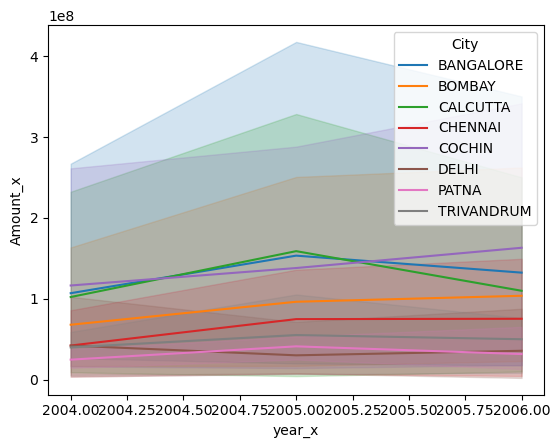

In [92]:
sns.lineplot(data=city_wise_spend, x='year_x', y='Amount_x', hue='City')  

### 4. Create graphs for
 a. Monthly comparison of total spends, city wise


In [89]:
agg_data=data.groupby(['City','month_name_x'])['Amount_x'].sum().reset_index()

<Axes: xlabel='month_name_x', ylabel='Amount_x'>

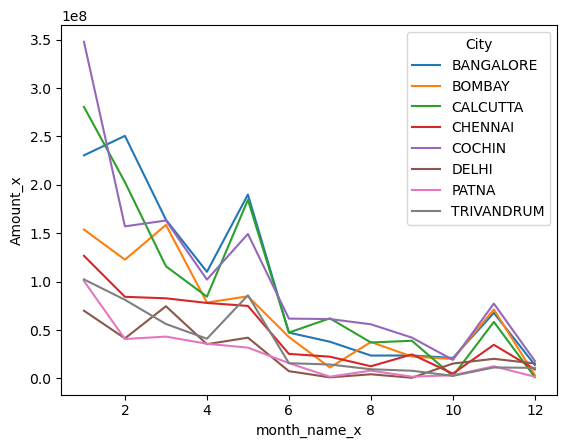

In [105]:
sns.lineplot(data=agg_data, x='month_name_x', y='Amount_x', hue='City')

###  b. Comparison of yearly spend on air tickets

In [98]:
air_tick=data[data['Type']=='AIR TICKET']
agg_data1=air_tick.groupby('year_x')['Amount_x'].sum().reset_index()

<Axes: xlabel='year_x', ylabel='Amount_x'>

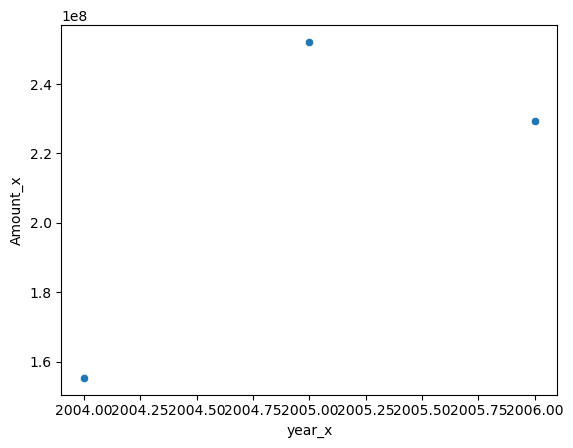

In [100]:
sns.scatterplot(x="year_x",y="Amount_x",data=agg_data1)

###  c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [101]:
agg_data2=data.groupby(['month_name_x','Product'])['Amount_x'].sum().reset_index()

<Axes: xlabel='month_name_x', ylabel='Amount_x'>

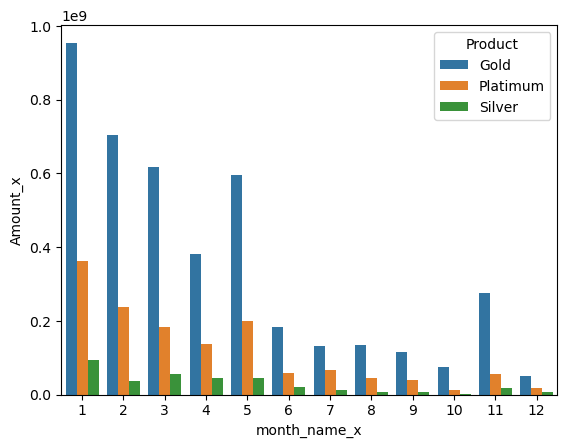

In [103]:
sns.barplot(data=agg_data2, x='month_name_x', y='Amount_x', hue='Product')

### 5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by 
different products and by different time periods i.e. year or month. The user should be able 
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
function should automatically take these inputs while identifying the top 10 customers.

In [107]:
def info(product,time):
    req_data=data[(data['Product']==product) & (data['month_name_y']==time)]
    agg_data=req_data.groupby(['Customer','City'])['Amount_y'].sum().sort_values(ascending=False).head(10)
    return agg_data

In [110]:
product=input('enter product')
time=int(input('enter time'))
info(product,time)

enter productGold
enter time1


Customer  City      
A60       CALCUTTA      1.028460e+08
A42       BOMBAY        9.297462e+07
A61       COCHIN        8.132795e+07
A43       BANGALORE     6.536348e+07
A45       COCHIN        6.406517e+07
A13       BANGALORE     5.451311e+07
A27       CHENNAI       5.251206e+07
A44       DELHI         5.135237e+07
A12       BOMBAY        4.984704e+07
A28       TRIVANDRUM    3.834248e+07
Name: Amount_y, dtype: float64